In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df_ADNIMERGE = pd.read_csv('./ADNI/ADNIMERGE.csv')
df_PTDEMOG = pd.read_csv('./ADNI/PTDEMOG.csv')


In [12]:
df_ADNIMERGE.groupby('ORIGPROT').size()

ORIGPROT
ADNI1     7106
ADNI2     5195
ADNI3      567
ADNIGO    1168
dtype: int64

In [21]:
#Chck in ADNI 
df_ADNI1 = df_ADNIMERGE[df_ADNIMERGE['ORIGPROT'] == 'ADNI1']
df_ADNI1DEMOG = df_PTDEMOG[df_PTDEMOG['Phase']== 'ADNI1']
df_ADNI1.shape
df_ADNI1DEMOG.shape

(1443, 32)

In [ ]:
#Merging ADNIMERGE and DEMOG DFs


APOE Genotype
2-3     27
2-4      6
3-3    201
3-4    126
4-4     24
dtype: int64

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
num_bins =10
X = df_original['Age at Screening']
# sns.set_style('darkgrid')
# sns.distplot(X, kde = False)

df_original.groupby(['Age at Screening']).size()

import matplotlib.pyplot as plt
import numpy as np
#Only select with population type 1
df_mod_1=df_original[(df_original['Population Number'] == int(1)) & (df_original['Age at Screening'] >0)]
#Delete records with patient age at 0
#df_original= df_original[df_original['Age at Screening'] >0]



# distribution of the age of screening

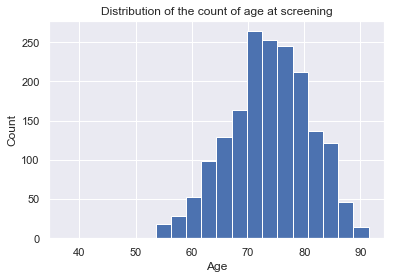

In [3]:
# %matplotlib inline
# X
X = df_mod_1['Age at Screening']
plt.hist(X, density=False, bins=20) # density
plt.ylabel('Count');
plt.xlabel('Age')
plt.title('Distribution of the count of age at screening')
plt.show()

# Distribution of the Diagnosis Group at Screening

In [4]:
# %matplotlib inline
# X
X = df_mod_1['Diagnosis Group at Screening']
# plt.hist(X, density=False, bins=20) # density
# plt.ylabel('Count');
# plt.xlabel('Age')
# plt.title('Distribution of the count of age at screening')
# plt.show()
df_mod_1.groupby(['Diagnosis Group at Screening']).size()

Diagnosis Group at Screening
MCI    1785
dtype: int64

# Distribution of the MMSE score at Screening

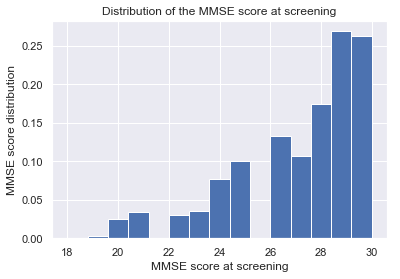

In [6]:
X = df_mod_1['MMSE Total Score (Screening)']
plt.hist(X, density=True, bins=15) # density
plt.ylabel('MMSE score distribution');
plt.xlabel('MMSE score at screening')
plt.title('Distribution of the MMSE score at screening')
plt.show()
#df_mod_1.groupby(['Diagnosis Group at Screening']).size()

# Distribution of the Modified Hachinski Total Score (Screening) 

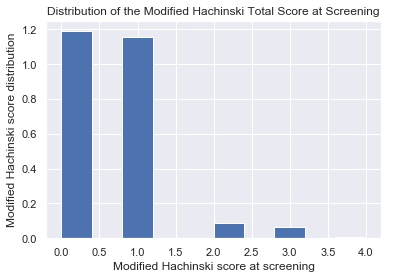

In [7]:
X = df_mod_1['Modified Hachinski Total Score (Screening)']
plt.hist(X, density=True, bins=10) # density
plt.ylabel('Modified Hachinski score distribution');
plt.xlabel('Modified Hachinski score at screening')
plt.title('Distribution of the Modified Hachinski Total Score at Screening')
plt.show()

# Distribution of the NPI-Q Total Score (Baseline)   

In [ ]:
# df_mod_1.dropna(subset=['NPI-Q Total Score (Baseline)'])
df_mod_2 = df_mod_1.dropna(subset=['NPI-Q Total Score (Baseline)'])
NPI_baseline= df_mod_2['NPI-Q Total Score (Baseline)']
df_mod_2 = df_mod_1.dropna(subset=['NPI-Q Total Score (Month 6)'])
NPI_m6= df_mod_2['NPI-Q Total Score (Month 6)']
df_mod_2 = df_mod_1.dropna(subset=['NPI-Q Total Score (Month 12)'])
NPI_m12= df_mod_2['NPI-Q Total Score (Month 12)']
df_mod_2 = df_mod_1.dropna(subset=['NPI-Q Total Score (Month 18)'])
NPI_m18= df_mod_2['NPI-Q Total Score (Month 18)']
df_mod_2 = df_mod_1.dropna(subset=['NPI-Q Total Score (Month 24)'])
NPI_m24= df_mod_2['NPI-Q Total Score (Month 24)']

#plt.hist(NPI_m12, density=True, bins=10) # density
# plt.ylabel('NPI-Q Total Score (Baseline) score distribution');
# plt.xlabel('NPI-Q Total Score (Baseline)')
# plt.title('Distribution of the NPI-Q Total Score (Baseline)')
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

C:\Users\Debraj\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


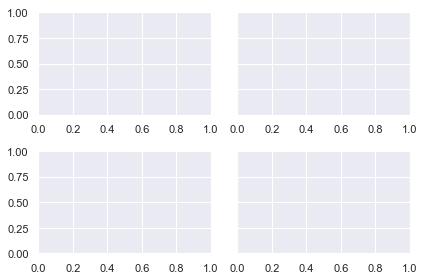

In [12]:
import numpy as np
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0].hist(NPI_baseline, bins=10)
axs[0].set_title('NPI (Q) at baseline')
axs[1].hist(NPI_m6, bins=10)
axs[1].set_title('NPI (Q) at 6 months')
axs[2].hist(NPI_m12, bins=10)
axs[2].set_title('NPI (Q) at 12 months')
axs[3].hist(NPI_m18, bins=10)
axs[3].set_title('NPI (Q) at 18 months')